
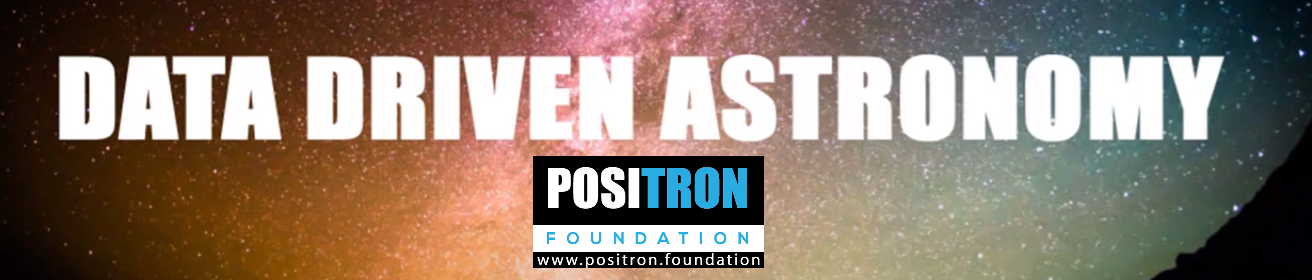




Welcome to **II week** of **Data Driven Astronomy** Online course organized by **Positron Foundation**

This week we will be learning about IFU data. Before we start let's install few pre-requisites.

In [ ]:
!pip install sdss-marvin --quiet

In [ ]:
!git clone https://github.com/Jack3690/DDA

fatal: destination path 'DDA' already exists and is not an empty directory.


# **Configuring Marvin**

In [ ]:
!cp -a DDA/sas /root/

!cp -a DDA/sas/map.py /usr/local/lib/python3.7/dist-packages/marvin/utils/plot/

!mkdir  /root/sas/dr16
!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

mkdir: cannot create directory ‘/root/sas/dr16’: File exists


In [ ]:
cd DDA/Week_2/data

/content/DDA/Week_2/data


# **Packages**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits

from marvin import config
import marvin.utils.plot.map as mapplot 

# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

/usr/local/lib/python3.7/dist-packages/marvin/core/exceptions.py:51: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  UserWarning)
[INFO]: No release version set. Setting default to DR15


# **MaNGA**

Mapping Nearby Galaxies at APO (MaNGA) (Bundy et al., 2015)
is the newest survey component of the Sloan Digital Sky Survey. Its goal is to map the detailed composition and kinematic structure of ~ 10,000 nearby galaxies. Unlike previous SDSS surveys which obtained spectra only at the centers of target galaxies, MaNGA enables spectral measurements across the face of each of 10,000 nearby galaxies thanks to 17 simultaneous ”integral field units” (IFUs), each composed of tightly-packed arrays of
optical fibers.

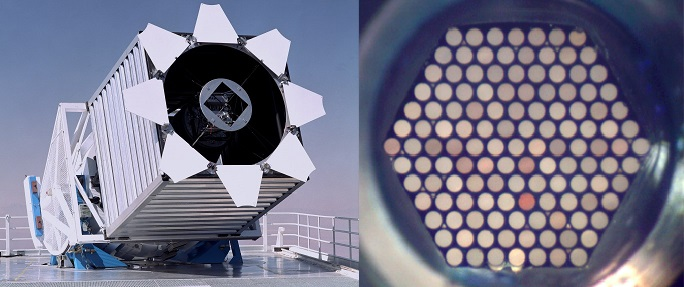

Figure 2.1.1 (Left : SDSS Telescope at APO | Right : IFU Fibers)

The MaNGA instrument utilizes the 2.5 m Sloan Telescope in its spectroscopic mode. In its final form, MaNGA will provide 17 fiber-bundle science IFUs that can be deployed totarget sources anywhere within the 3 degree diameter focal plane. These IFUs feed light into the two dual-channel BOSS spectrographs (Smee et al., 2013), which maintain the same configuration as was used in SDSS-III


**IFU**

IFU spectroscopy is an observing technique that provides spectral information over a 2D field of view using instruments known as IFUs (Integral Field Units). This technique is distinct from previous spectroscopic surveys in SDSS which obtained spectra at only a single point, or longslit spectroscopy which provides some spatial information but only along a single slice through an object. Although IFU spectroscopy provides spatially resolved information, it is distinct from traditional broadband imaging which blends the light over a wide range of wavelengths

# **Marvin**

Marvin (Cherinka and et.al, 2019) is a complete ecosystem designed for overcoming the challenge of searching, accessing, and visualizing the MaNGA data. It consists of three components: a Python package, Application Programming Interface, and a web application utilizing a remote database. Marvin allows users to seamlessly work with MaNGA data by abstracting both remote and local (on-disk) interactions to behind-the-scenes datahandling
functions. Combining this capability with additional processing and querying
tools, users can create powerful Python workflows that are easy to import and share. Let's initiate marvin with SDSS Data Release 15 (DR15)



In [ ]:
# set the release to DR15
config.setRelease("DR15")
config.release

'DR15'

All Marvin Tools are built off a set of common core functionalities and features, and thus behave in very similar ways. There are four main classes provided in Marvin: the Cube, the RSS, the Maps, and the ModelCube. We will start by focusing on a Marvin Cube to demonstrate the common features and handling of Marvin Tools. Everything discussed here also applies to any of the other available Marvin Tools listed above.

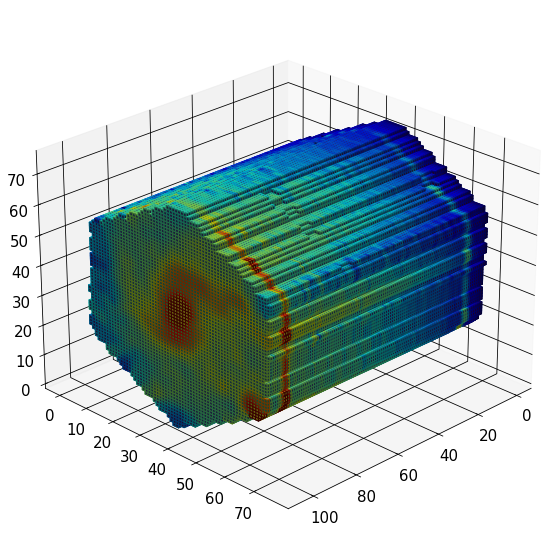

Figure 2.1.2 : Visual representation of a data Cube

#**Cube**

Cube is a class to interact with a fully reduced DRP data cube for a galaxy. [Learn more](https://sdss-marvin.readthedocs.io/en/latest/tools/cube.html)

In [ ]:
from marvin.tools.cube import Cube

In [ ]:
cube = Cube(plateifu='9883-9102',mode='remote')

Cube is a class to interact with a fully reduced DRP data cube for a galaxy. 

PLATEIFU is a unique ID given to a source based on MaNGA observation. MANGAID is N unique ID assigned to a particular galaxy observed as part of MaNGA survey. A galaxy can have more than one PLATEIFU from different observation cycles. But MANGAID is an unique identifier to a galaxy in MaNGA survey. 

Let's look at the SDSS image of this source

In [ ]:
sdss_cutout = cube.getImage()

[WARNING]: Specified hdu=MANGA not found, reading in first available table (hdu=1) instead. This will result in an error in future versions! (AstropyDeprecationWarning)


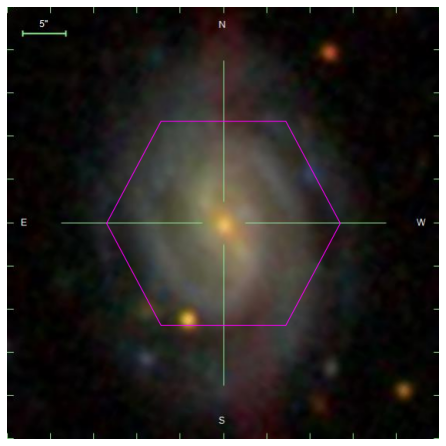

In [ ]:
sdss_cutout.plot()

In [ ]:
sdss_cutout.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 256.64139  33.692983  
CRPIX : 281.0  281.0  
PC1_1 PC1_2  : -2.47222222222e-05  0.0  
PC2_1 PC2_2  : 0.0  2.47222222222e-05  
CDELT : 1.0  1.0  
NAXIS : 0  0

**Exercise 3.1**

Write code to display sdss_cutout with wcs projection

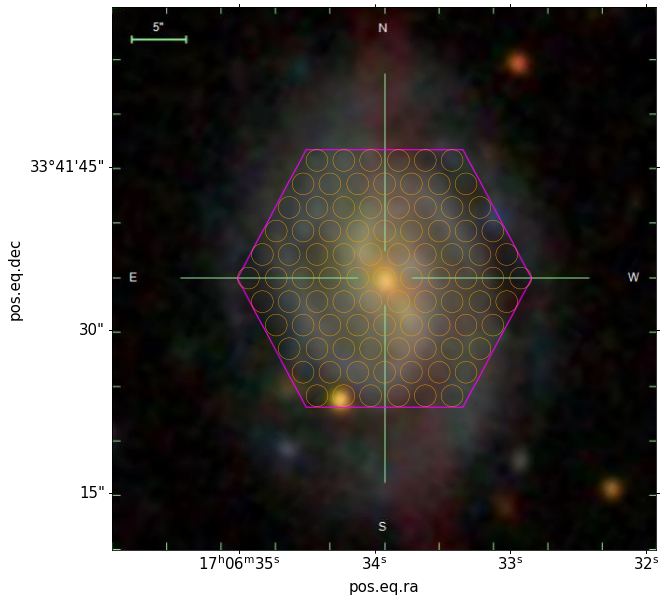

In [ ]:
wcs = sdss_cutout.wcs  # wcs object

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = wcs)

ax.imshow(sdss_cutout.data)

# Overlaying fibers

sdss_cutout.overlay_fibers(ax=ax)

Let's look at header file of the cube to learn more

In [ ]:
cube.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  = '-32     '           / Number of bits per data pixel                  
NAXIS   = '3       '           / Number of data axes                            
NAXIS1  = '64      '                                                            
NAXIS2  = '64      '                                                            
NAXIS3  = '4563    '                                                            
PCOUNT  = '0       '           / No Group Parameters                            
GCOUNT  = '1       '           / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>'       
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

In [ ]:
print(cube.header['NAXIS1'],cube.header['NAXIS2'],cube.header['NAXIS3'])

64 64 4563


We see that cube has 3 dimensions where 2 dimensions are spacial and 1 dimension is spectral. Let's look at the wcs header for more info

In [ ]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 256.64139  33.692983  3.62159598486e-07  
CRPIX : 33.0  33.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.000138889  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.000138889  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  8.33903304339e-11  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

For getting spectrum of a particular spaxel the function getSpaxel is used. Let's find the spectrum of the central spaxel. getSpaxel function has xyorigin set to center of image by default thus central spaxel will have coordinates (0,0)

In [ ]:
cen = cube.getSpaxel(x=0,y=0)
cen

<Marvin Spaxel (plateifu=9883-9102, x=32, y=32; x_cen=0, y_cen=0, loaded=cube)>

Let's plot the flux

[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


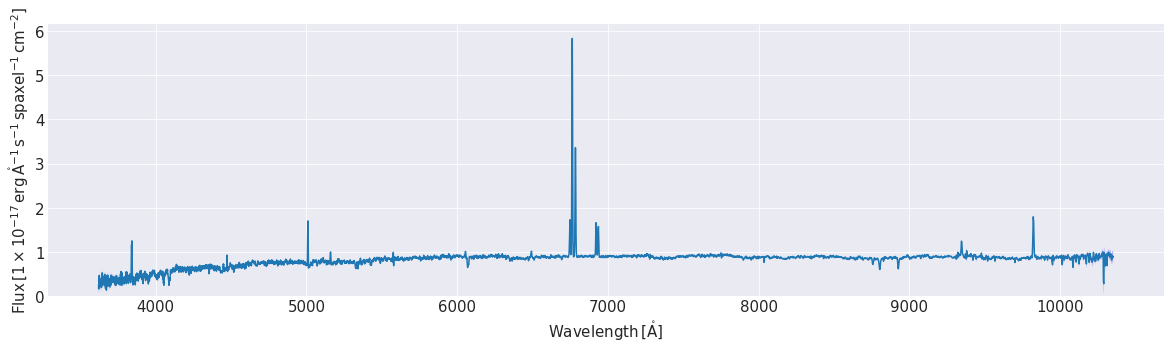

In [ ]:
fig = plt.figure(figsize=(20,5))
cen.flux.plot(figure=fig)

In the spectrum we can see absorption lines and emission line. Standard spectroscopic analysis can be done to this data for extracting information

#**Maps**

Maps is a class to interact with the set of DAP maps for a galaxy. They are like snap shots of galaxy at different wavelengths. Apart from emission line maps Marvin has provision for generating a variety of maps such as equivalent width, Stellar velocity, Spectral Indexes like Dn4000 etc. [Learn more](https://sdss-marvin.readthedocs.io/en/latest/tools/maps.html)

In [ ]:
maps = cube.getMaps()

In [ ]:
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='2.2.1', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='2.2.1', unit=''>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.2.1', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='2.2.1', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='2.2.1', unit=''>,
 <Property 'binid', channel='binned_spectra', release='2.2.1', unit=''>,
 <Property 'binid', channel='stellar_continua', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_moments', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_models', release='2.2.1', unit=''>,
 <Property 'binid', channel='spectral_indices', release='2.2.1', unit=''>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.2.1',

##**H alpha Map**



H-alpha $H_{\alpha}$ is a specific deep-red visible spectral line in the Balmer series with a wavelength of 656.28 nm in air; it occurs when a hydrogen electron falls from its third to second lowest energy level. H-alpha light is the brightest hydrogen line in the visible spectral range. H alpha emission is mostly observed in star forming regions. Star forming regions have yound O-B type stars at temperture of order of 10,000K. The UV photons from such O-B type stars photo-ionize hydrogen atoms in the ISM causing them to emit hydrogen emission lines such as H alpha.

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff63b5236d0>)

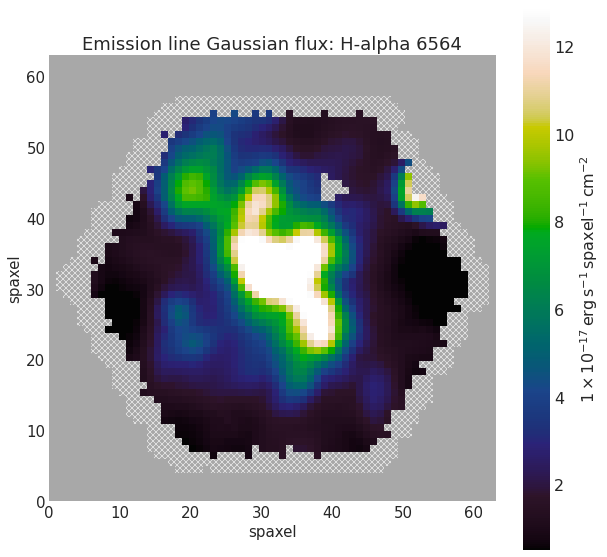

In [ ]:
ha = maps['emline_gflux_ha_6564']
ha.plot()

In [ ]:
ha.unit

Unit("1e-17 erg / (cm2 s spaxel)")

In [ ]:
ha.mean()

<Marvin Map (property='emline_gflux_ha_6564')>
1.5092123559570312 1e-17 erg / (cm2 s spaxel)

In [ ]:
maps.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 256.64139  33.692983  3.62159598486e-07  
CRPIX : 33.0  33.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.000138889  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.000138889  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  8.33903304339e-11  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

When we look at wcs of maps object we notice that it has 3 dimensions, but we know that images only need 2 dimensions. Thus we need to slice the wcs object to 2 spacial dimensions. Let's look at how to use mapplot.plot function to plot maps with sliced wcs object.

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7ff62cedb690>)

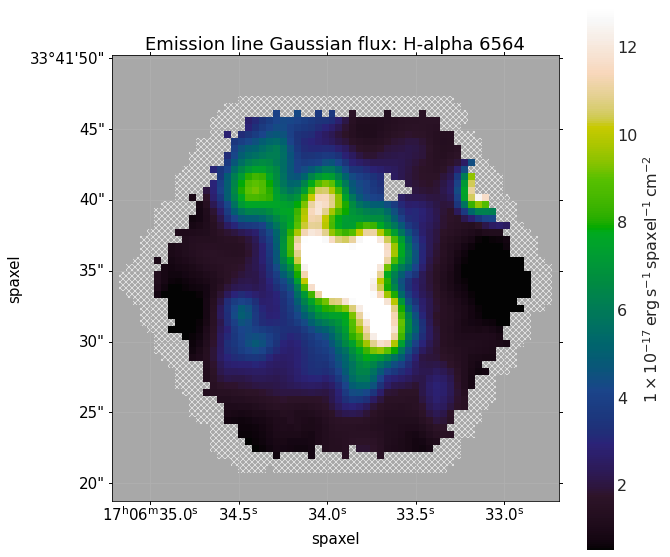

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs , slices = ['x','y',0])

mapplot.plot(dapmap = ha, ax = ax, fig = fig )

Accessing the maps are fairly simple. Let's learn how to use maps to extract science

**Gas Phase Metallicity**

In the Universe most of the matter is hydrogen or helium, astronomers call all elements
heavier than hydrogen and helium as metals. Metallicity is defined as the abundance of
elements that are heavier than hydrogen and helium in a source. In our sample, we utilized
the [NII]/Ha emission line ratio to measure the gas-phase metallicity, specifically N21
metallicity calibration from Pettini and Pagel (2004) was used

$12+ \log (O/H) = 8.9 + 0.57\times\log\left(\dfrac{F(N[II])}{F(H_{\alpha})}\right)$


**Exercise 3.2**

Evaluate and plot the RHS of the equation above using N[II] (6585) and $H_{\alpha}$ maps and plot the final map using mapplot.plot with wcs projection

In [ ]:
nii =  maps['emline_gflux_nii_6585']                            #  NII emission line gaussian flux (6585 Angstrom)
ha  =  maps['emline_gflux_ha_6564']                            #  H alpha  emission line gaussian flux (6564 Angstrom)

n2  = nii/ha

logn2 = np.log10(n2)

logoh = (8.9+(0.57*logn2))                         # 8.9 + 0.57log(F(NII)/F(Ha))

Following code is an example on how to use mapplot and maps.wcs

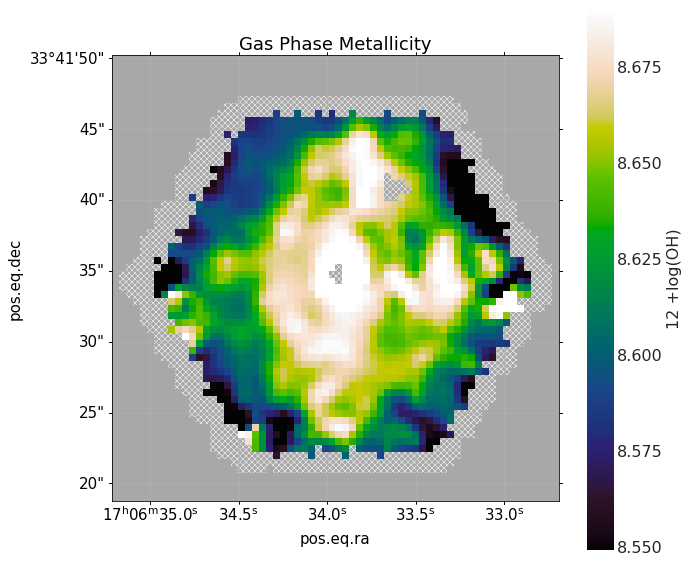

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs , slices = ['x','y',0])

mapplot.plot(dapmap = logoh ,title = 'Gas Phase Metallicity',ax = ax, fig = fig ,cblabel = '12 +log(OH)')
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

**Exercise 3.3**

Star Forming Rate Density (SFRD). In this section objective is to use Marvin maps to estimate SFR and SFRD of MaNGA galaxies.

Follow the steps and complete the missing codes in cells below

Use Maps function to obtain maps for plateifu=7992-9102'

In [ ]:
from marvin.tools.maps import Maps

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


(<Figure size 2160x720 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff62c95f6d0>)

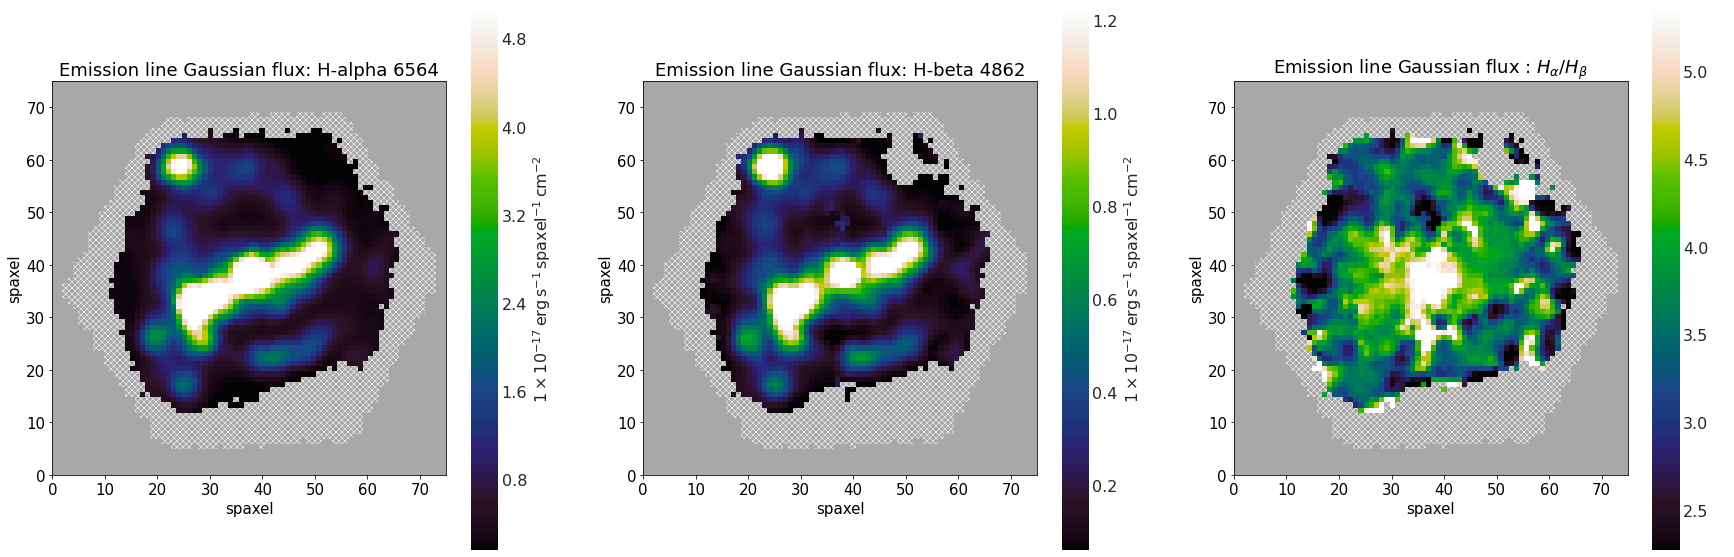

In [ ]:
maps = Maps(plateifu='8595-12705')

ha =   maps['emline_gflux_ha_6564']                            # H alpha flux

hb =   maps['emline_gflux_hb_4862']                           # H beta flux


ha_hb = ha/hb

# Plot H alpha, H Beta and H_alpha/H_beta

fig,ax = plt.subplots(1,3,figsize=(30,10))

mapplot.plot(dapmap=ha,ax=ax[0],fig=fig)

mapplot.plot(dapmap=hb,ax=ax[1],fig=fig)

mapplot.plot(dapmap=ha_hb,ax=ax[2],fig=fig,title=r'Emission line Gaussian flux : $H_{\alpha}/H_{\beta}$')

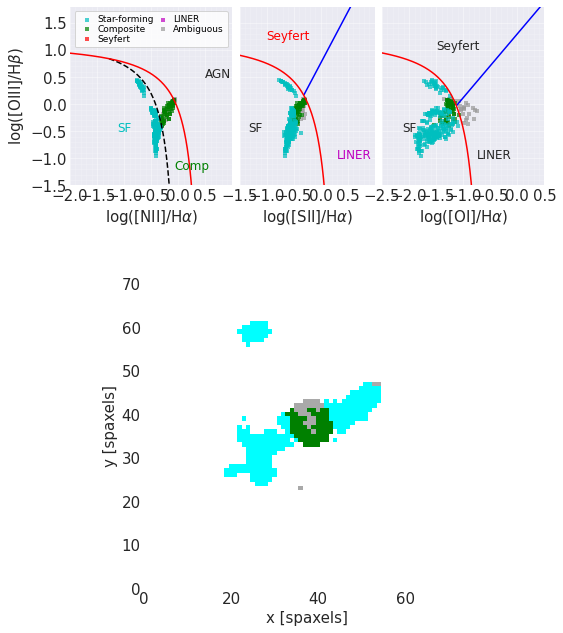

In [ ]:
mask,fig,ax = maps.get_bpt()

The BPT diagrams (named after "Baldwin, Phillips & Telervich") are a set of nebular emission line diagrams used to distinguish the ionization mechanism of nebular gas. The most famous version consists of [NII] 6584/$H_{\alpha}$ versus [OIII] 5007/$H_{\beta}$ (the BPT-NII diagram; Fig. 5 of Baldwin et al 1981).

In the above figure blue color is for emission lines signifying star formation

In [ ]:
mask.keys()

dict_keys(['sf', 'comp', 'agn', 'seyfert', 'liner', 'invalid', 'ambiguous'])

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)


Text(0.5, 0.88, 'With Star Forming Mask')

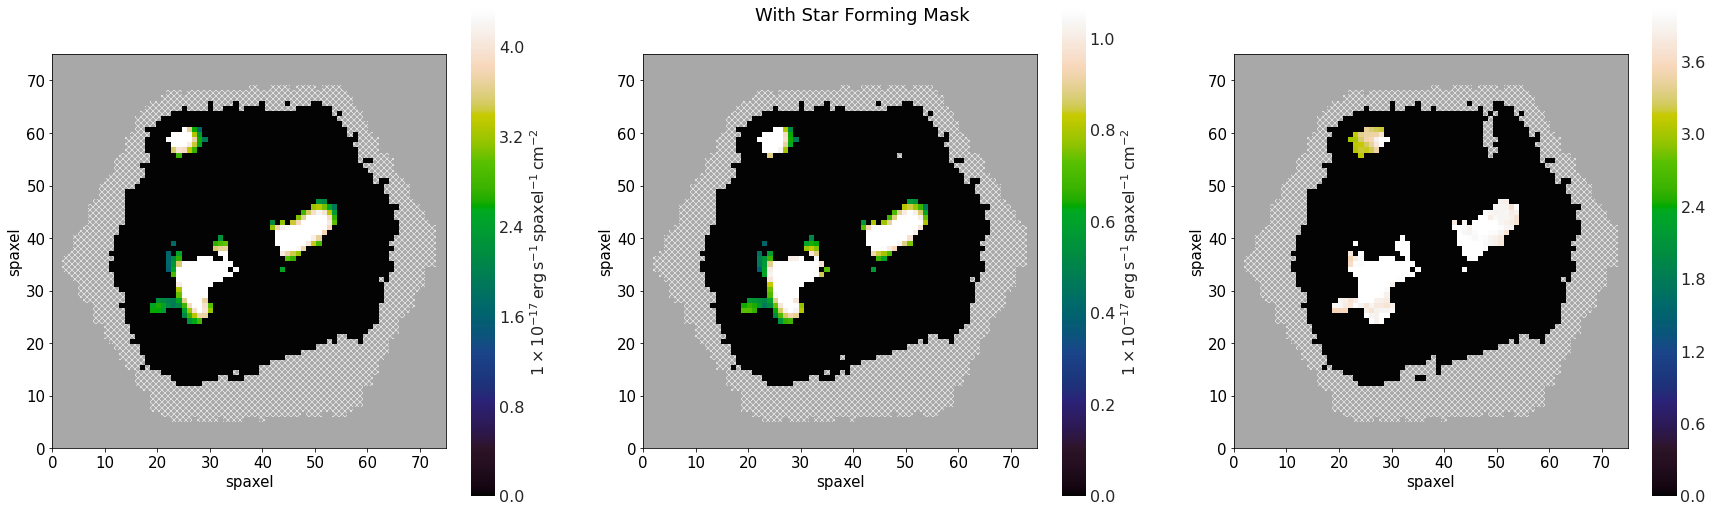

In [ ]:
sf =   mask['sf']['global']       # Choose global star forming mask

# Multiply star forming mask with H alpha, H beta and H_alpha/H_beta and Plot them

ha_sf = ha*sf

hb_sf = hb*sf

ha_hb_sf = (ha/hb)*sf

fig,ax = plt.subplots(1,3,figsize=(30,9))

mapplot.plot(dapmap=ha_sf,ax=ax[0],fig=fig)
mapplot.plot(dapmap=hb_sf,ax=ax[1],fig=fig)
mapplot.plot(dapmap=ha_hb_sf,ax=ax[2],fig=fig)




fig.suptitle('With Star Forming Mask',y=0.88)

Now we need to calculate dust corrected H alpha flux for which the formula is

$F_{H_{\alpha},0}=F_{H_{\alpha}}10^{k(H_{\alpha})E(B-V)}$

where  

$F_{H_{\alpha}}$ = ha_sf

$k(H_{\alpha}) = 2.468 $

$E(B-V) = 0.934\ln\left(\dfrac{F(H_{\alpha})}{F(H_{\beta})}\right)$



Calculate extinction corrected H alpha flux using formula given above

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


Unit("1e-17 erg / (cm2 s spaxel)")

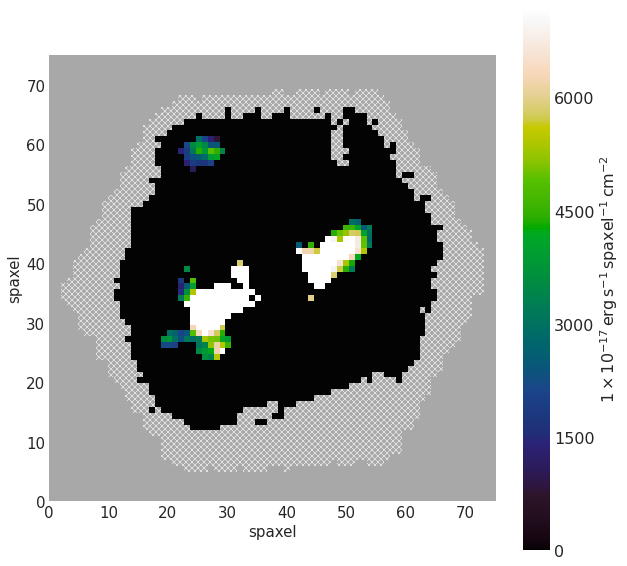

In [ ]:
Fa =  ha_sf*(10**(2.468*0.934*np.log(ha_hb_sf.value)))                           # Hint: Use only ha_hb_sf.value of map inside log
Fa.plot()
Fa.unit

Using astropy.cosmology and redshift data from cube, luminosity distance can be calulated as follows:

In [ ]:
z = maps.dapall['z']

D_L = cosmo.lookback_distance(z)

print(f'Redshift            : {z}\nLuminosity Distance : {D_L.to(u.kpc)}')

Redshift            : 0.0759605
Luminosity Distance : 311440.81668535026 kpc


Now dust corrected $H_{\alpha}$ lumonosity is given by

$L_{H_{\alpha}}= F_{H_{\alpha},0} 4\pi D_L^2$

Where 

$F_{H_{\alpha},0}$  is dust corrected $H_{\alpha}$ flux

$D_L$ is luminosity distance

Write code to calculate dust corrected $H_{\alpha}$ lumonosity 

In [ ]:
# Convert D_L to cm
D_L = D_L.to(u.cm)

# Calculate Luminosity Fa  and D_L
L = Fa*4*np.pi*D_L**2

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff62ccfab90>)

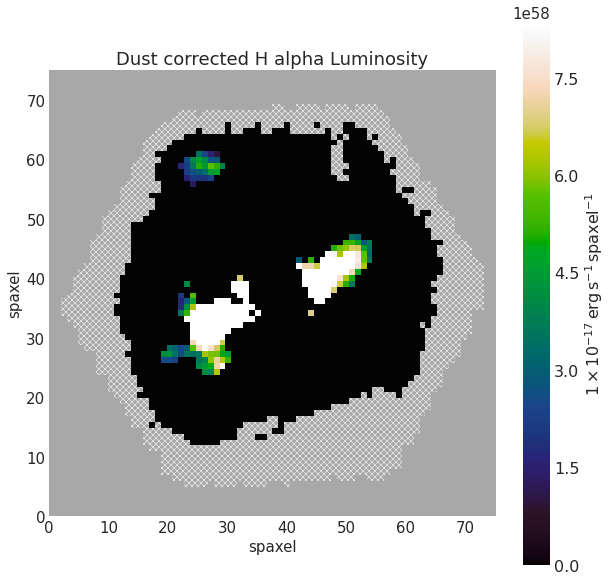

In [ ]:
# Plot luminosity with title 'Dust corrected H alpha Luminosity' and cblabel Fa.unit*D_L.unit**2
L.plot(title='Dust corrected H alpha Luminosity',cblabel=Fa.unit*D_L.unit**2)

Now from [Kennicutt's](https://ui.adsabs.harvard.edu/abs/1998ApJ...498..541K/abstract)

$SFR (M_{\odot} yr^{-1})= 5.5\times10^{-42}\times L_{H_{\alpha}}(erg /s)$

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff62c659810>)

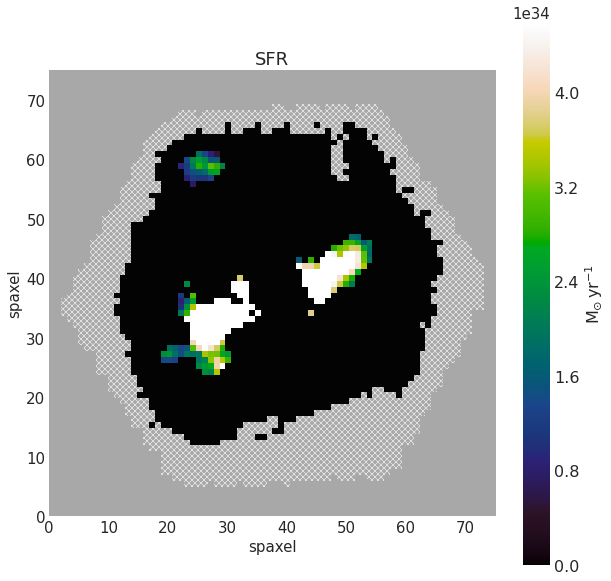

In [ ]:
SFR = 5.5*10**(-42)*L
SFR = SFR/1e-17      # 1e-17 is the scaling factor of L

SFR.plot(title='SFR',cblabel=u.solMass/u.year)

Now let's calculate the area of the map


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff636cf0250>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


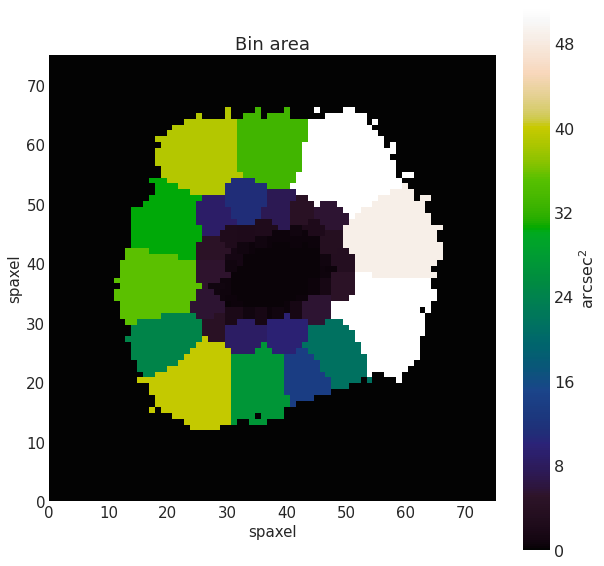

In [ ]:
bin_area =  maps.bin_area
bin_area.plot()

We notice that bin area has unit $arcsec^2$. To convert from angular distance to linear distance we use redshift.

In [ ]:
ang_dist = Planck15.kpc_proper_per_arcmin(z).to(u.kpc/u.arcsec)
ang_dist

<Quantity 1.48771437 kpc / arcsec>

Thus linear area = $bin\_area\times ang\_dist^2$

In [ ]:
area =   bin_area*ang_dist**2                            # unit here is kpc^2. Unit tranformation is not happening as ang_dist isn't a map object

area.unit*ang_dist.unit**2

Unit("kpc2")

**Star formation Rate Density**

SFRD = SFR/area

[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)


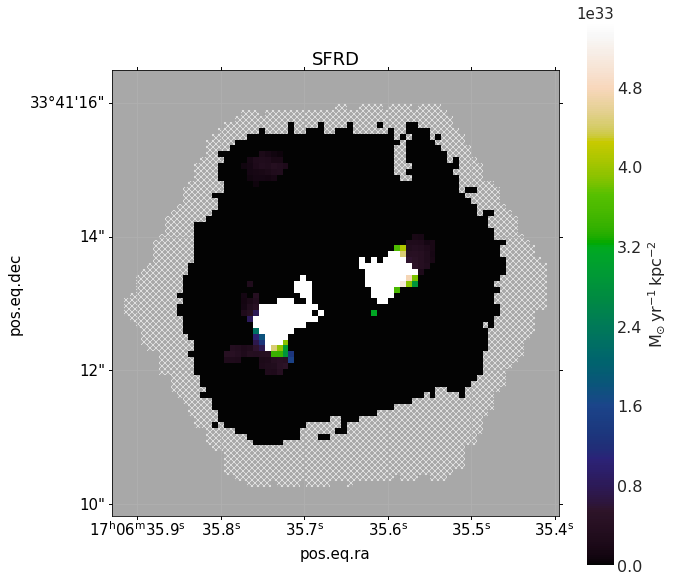

In [ ]:
# Use area.value
SFRD = SFR/area.value
maps.wcs
# add wcs projection using maps
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = wcs,slices=['x','y'])

# Plot SFRD with title 'SFRD'  and cblabel with unit u.solMass/(u.year*u.kpc**2) 
#SFRD.to(u.solMass/(u.year*u.kpc**2))

SFRD.plot(title="SFRD",fig=fig,ax=ax,cblabel=u.solMass/(u.year*u.kpc**2))
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

Let's plot SFRD vs R/R_e

In [ ]:
R = maps.spx_ellcoo_elliptical_radius # has units arcsecs
R_e = float(maps.header['reff'])      # has units arcsecs

Text(0.5, 1.0, 'SFRD vs $R/R_e$')

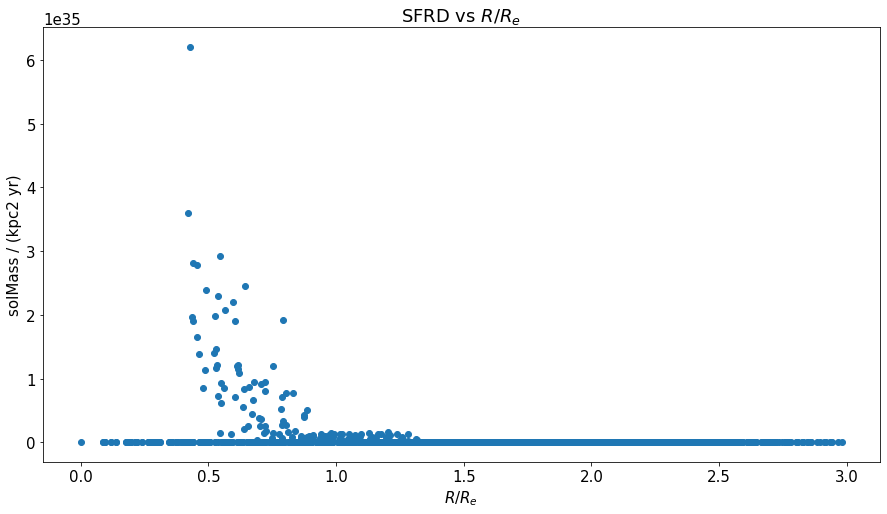

In [ ]:
x = R/R_e
y = SFRD

plt.figure(figsize=(15,8))
plt.scatter(x.value,y.value)

plt.xlabel(r'$R/R_e$')
plt.ylabel(u.solMass/(u.year*u.kpc**2))
plt.title(r'SFRD vs $R/R_e$')

# **Puzzle IV**



Follow the steps below and complete missing code segments

**I.** Write code to generate H alpha Map and Metallicity map with star forming mask for plateifu = '8131-9102' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps. Remove indefinite values from the array.

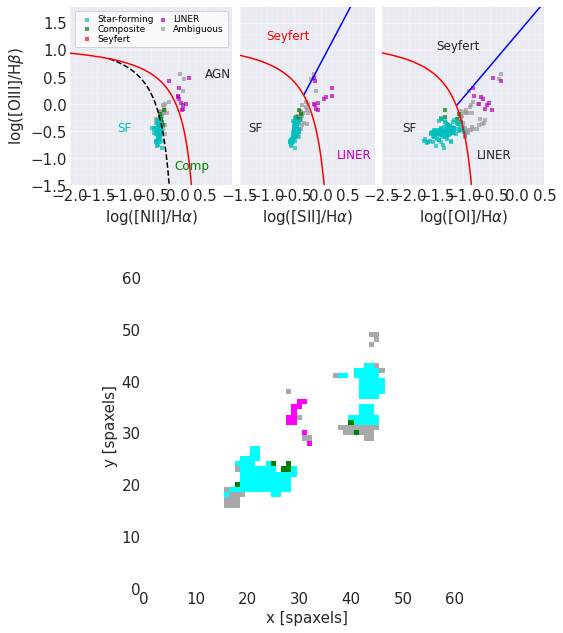

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)


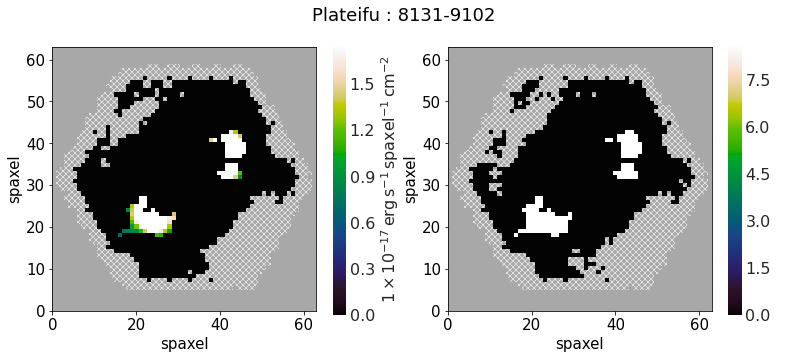

In [ ]:
plateifu = '8131-9102'

maps = Maps(plateifu = plateifu)

# Complete the code 

# Get H alpha map

ha = maps['emline_gflux_ha_6564']

# Get wcs for map

wcs = maps.wcs

# Get BPT

mask, fig, ax = maps.get_bpt()

# Get Global starforming mask

sf = mask['sf']['global']

# Apply star forming mask on ha

ha_sf = ha*sf

# Write code to create Gas Phase metallicity map

nii = maps['emline_gflux_nii_6585']                     #  NII emission line gaussian flux (6585 Angstrom)

n2  = nii/ha

logn2 = np.log10(n2)

logoh = (8.9 + 0.57*logn2)

# Apply star forming mask to metallicity map

logoh_sf = logoh*sf

# Plot the two maps with title in format 'Plateifu : 8131-9102' . Use fig.suptitle for figure title.

fig , ax = plt.subplots(1,2,figsize=(13,5))

ha_sf.plot(fig=fig,ax=ax[0])
logoh_sf.plot(fig=fig,ax=ax[1])
fig.suptitle('Plateifu : 8131-9102')


# Complete the code




# Add the value of two maps

data_1 =  ha_sf.value + logoh_sf.value                                # Map data

# remove indefinte values. Hint : use np.isnan | np.isinf 

data_1[np.isnan(data_1)|np.isinf(data_1)] = 0

Write code to display Map data

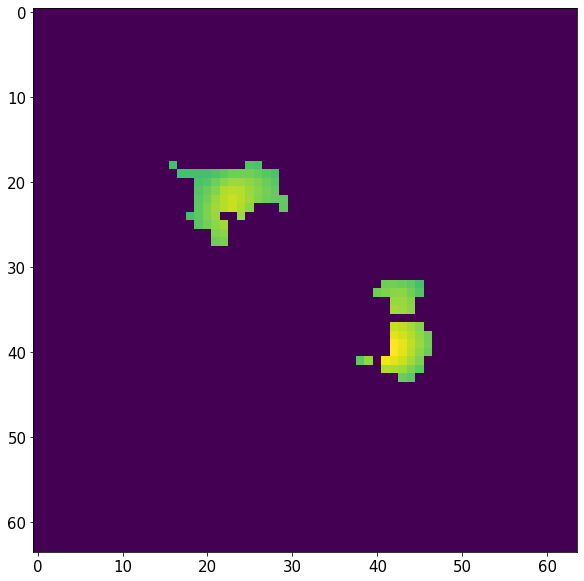

In [ ]:
plt.imshow(data_1)

Open 'puzzle_IV_8131-9102.fits' and retrieve the data

In [ ]:
f = fits.open('puzzle_IV_8131-9102.fits')
d1_p = f[0].data

Subtract map data from puzzle data and plot the difference

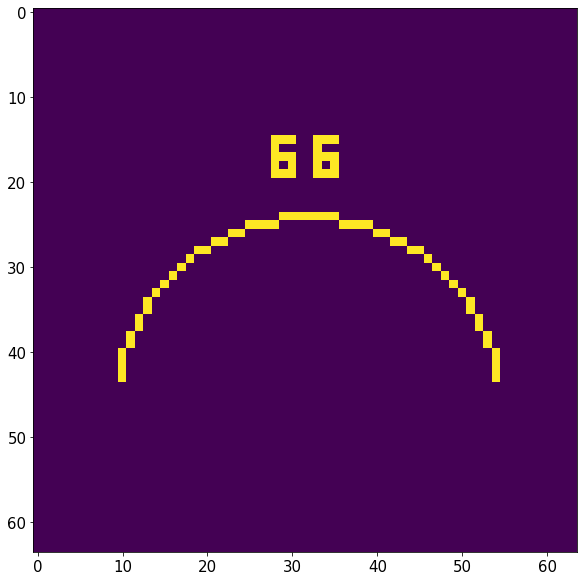

In [ ]:
data_1_diff = d1_p - data_1
plt.imshow(data_1_diff)

**II.** Write code to generate H alpha Map and Metallicity map without star forming mask for plateifu = '9181-9101' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


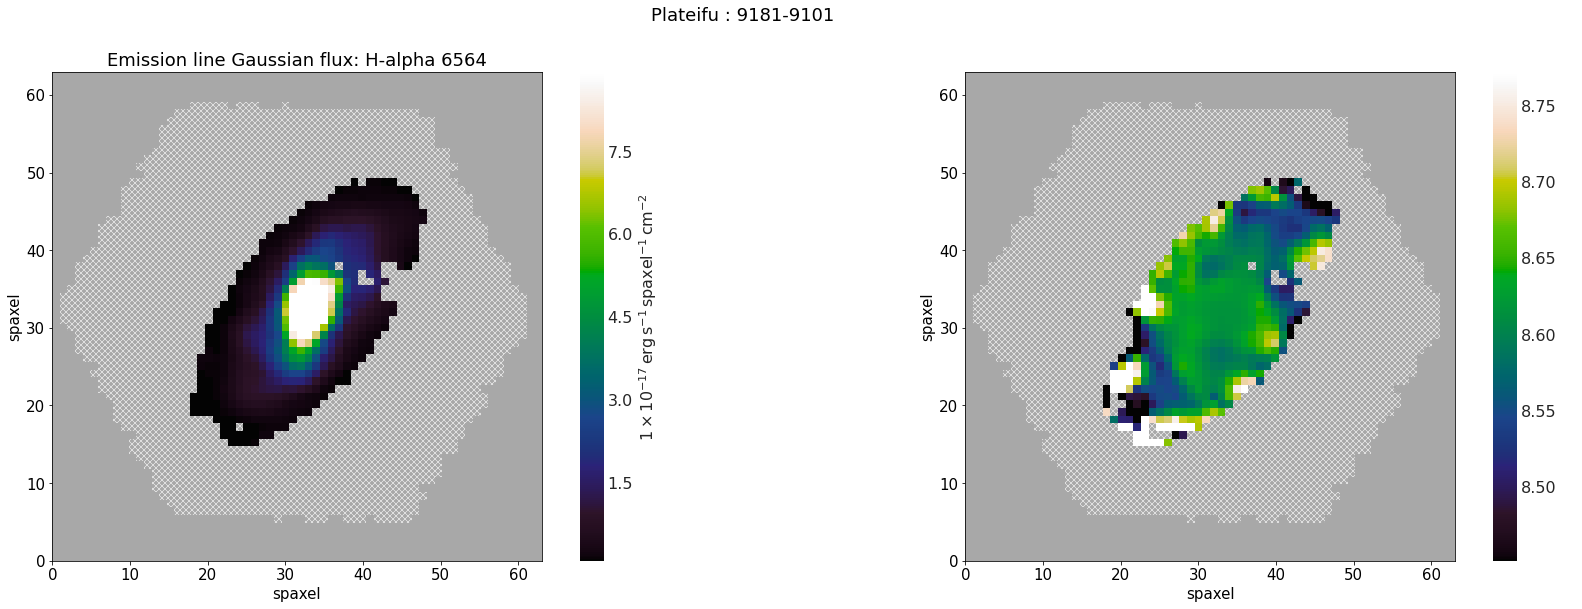

In [ ]:
plateifu =  '9181-9101'

# Complete the code 

maps = Maps(plateifu=plateifu)

# Get H alpha map

ha = maps['emline_gflux_ha_6564']

# Get wcs of maps

wcs= maps.wcs

# Write code to create Gas Phase metallicity map

nii = maps['emline_gflux_nii_6585']                              #  NII emission line gaussian flux (6585 Angstrom)

n2  = nii/ha

logn2 = np.log10(n2)

logoh = (8.9+(0.57*logn2))


# Plot the two maps with title in format 'Plateifu : 9181-9101' . Use fig.suptitle for figure title.

fig,ax = plt.subplots(1,2,figsize=(30,9))

mapplot.plot(dapmap=ha,ax=ax[0],fig=fig)
mapplot.plot(dapmap=logoh,ax=ax[1],fig=fig)
fig.suptitle('Plateifu : 9181-9101')


# Add the value of two maps

data_2 = ha.value + logoh.value            # Map Data

# remove indefinte values. Hint : use np.isnan | np.isinf 

data_2[np.isnan(data_2)|np.isinf(data_2)] = 0


Write code to display Map data

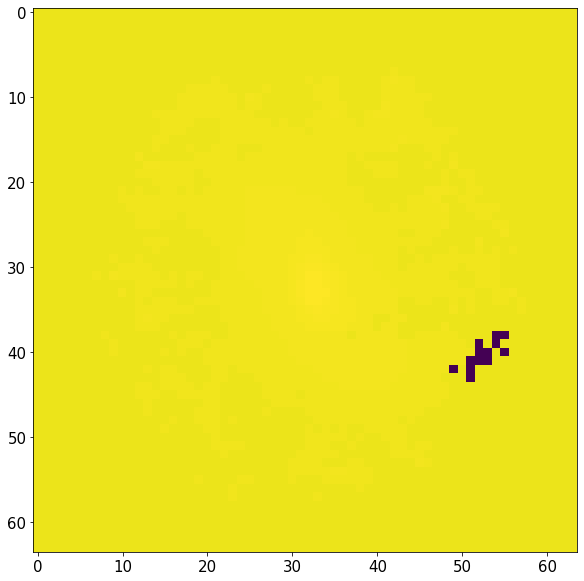

In [ ]:
plt.imshow(data_2)

Open 'puzzle_IV_9181-9101.fits' and retrieve the data

In [ ]:
f = fits.open('puzzle_IV_9181-9101.fits')
d2_p = f[0].data

[WARNING]: unclosed file <_io.FileIO name='puzzle_IV_8131-9102.fits' mode='rb' closefd=True> (ResourceWarning)


Subtract map data from puzzle data and plot the difference

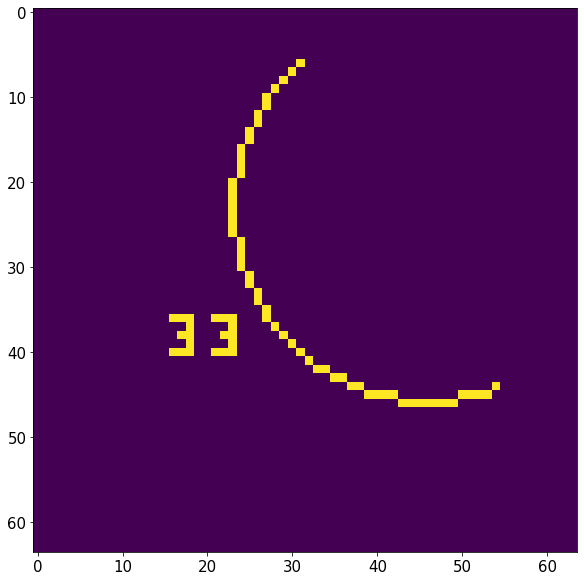

In [ ]:
data_2_diff = d2_p - data_2
plt.imshow(data_2_diff)

**III.** Write code to generate H alpha Map and OIII map without star forming mask for plateifu = '8086-9101' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

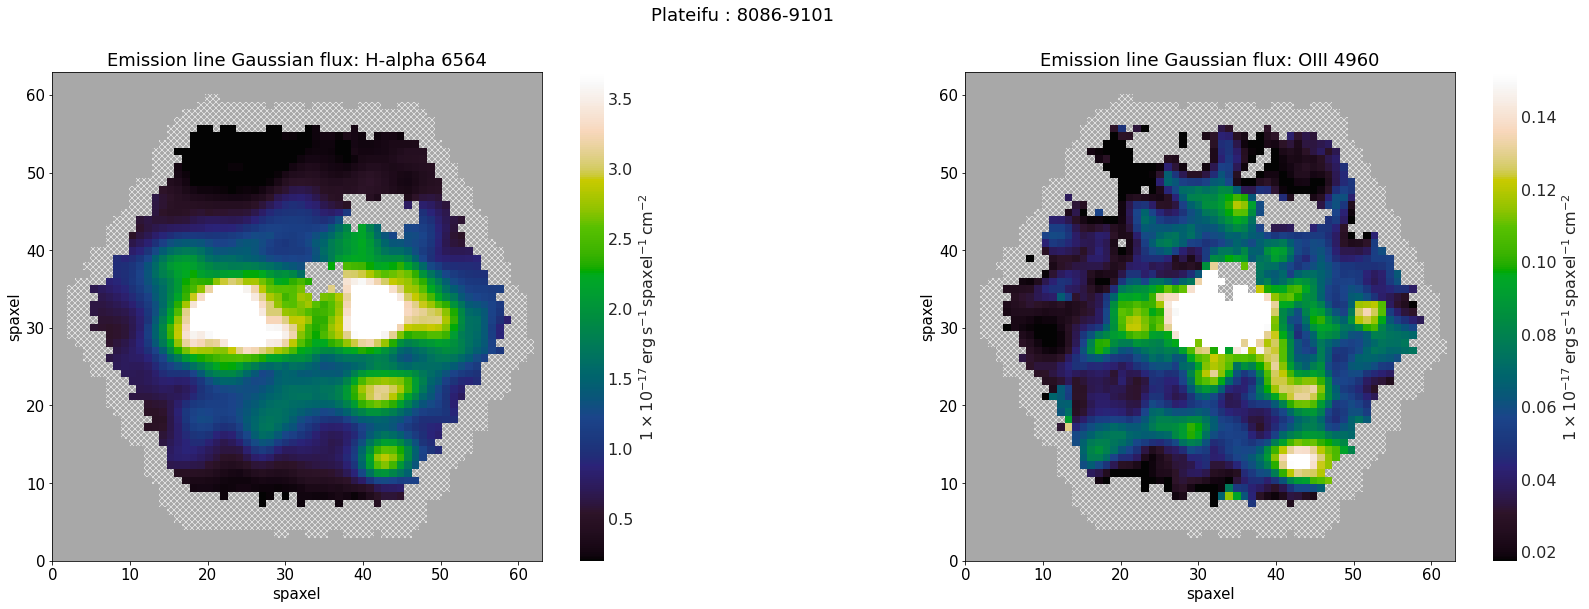

In [ ]:
plateifu = '8086-9101'

# Complete the code 

maps = Maps(plateifu=plateifu)

# Get H alpha map

ha =  maps['emline_gflux_ha_6564']

# Get wcs of maps

wcs = maps.wcs

# Get OIII map

oiii =  maps['emline_gflux_oiii_4960']                         #  OIII emission line gaussian flux (4960 Angstrom)


# Plot the two maps with title in format 'Plateifu : 8086-9101' . Use fig.suptitle for figure title.

fig,ax = plt.subplots(1,2,figsize=(30,9))

mapplot.plot(dapmap=ha,ax=ax[0],fig=fig)
mapplot.plot(dapmap=oiii,ax=ax[1],fig=fig)
fig.suptitle('Plateifu : 8086-9101')


# Add the value of two maps

data_3 = ha.value + oiii.value                               # Map data

# remove indefinte values. Hint : use np.isnan and np.isinf 

data_3[np.isnan(data_3)|np.isinf(data_3)] = 0

Write code to display Map data

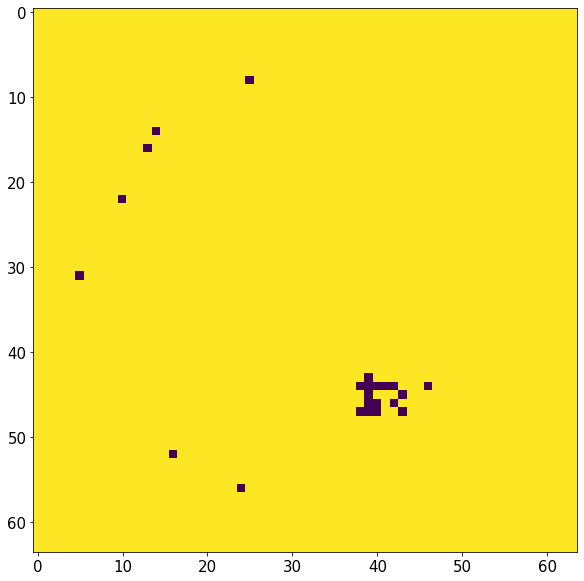

In [ ]:
plt.imshow(data_3)


Open 'puzzle_IV_8086-9101.fits' and retrieve the data

In [ ]:
f = fits.open('puzzle_IV_8086-9101.fits')
d3_p = f[0].data

[WARNING]: unclosed file <_io.FileIO name='puzzle_IV_9181-9101.fits' mode='rb' closefd=True> (ResourceWarning)


Subtract map data from puzzle data and plot the difference

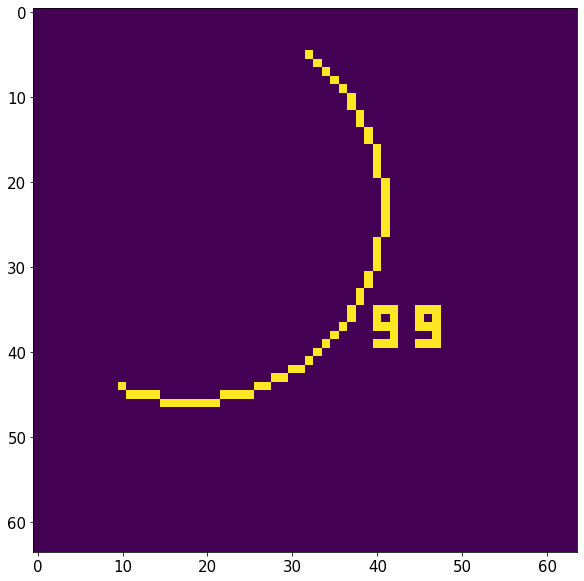

In [ ]:
data_3_diff = d3_p - data_3
plt.imshow(data_3_diff)

**IV.** Write code to generate OIII Map and [NII] map with star forming mask for plateifu = '8551-9102' and plot them with WCS projection. Then create an array which stores the sum of values of the two maps.

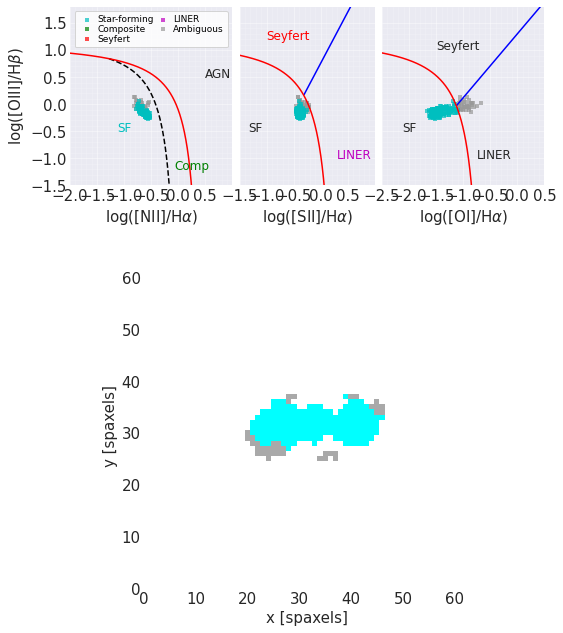

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)


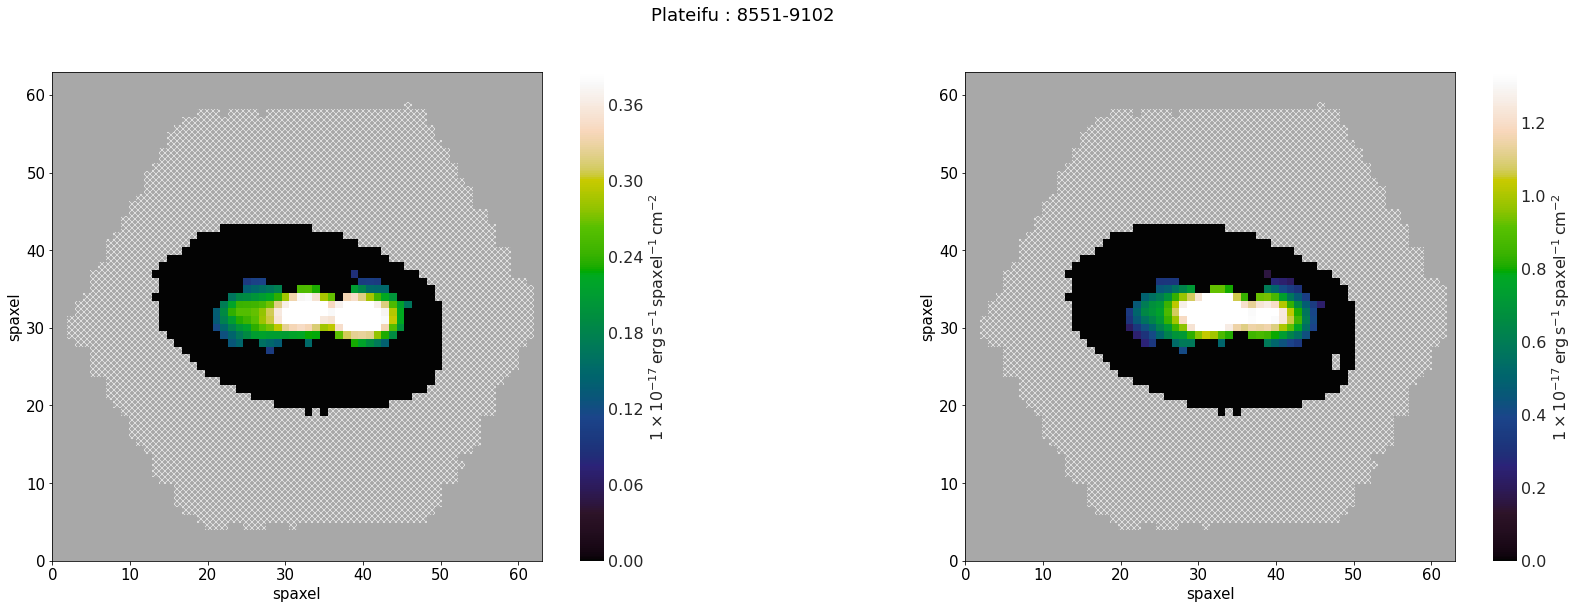

In [ ]:
plateifu =  '8551-9102'

# Complete the code 
maps = Maps(plateifu=plateifu)


# Get OIII map
oiii =  maps['emline_gflux_oiii_4960']                              #  OIII emission line gaussian flux (4960 Angstrom)



# Get BPT
mask,fig,ax = maps.get_bpt()


# Get Global starforming mask
sf =   mask['sf']['global']


# Apply star forming mask on oiii

oiii_sf = oiii*sf

# Get [NII] map

nii =  maps['emline_gflux_nii_6585']                                     #  NII emission line gaussian flux (6585 Angstrom)

# Apply star forming mask on nii

nii_sf = nii*sf

# Plot the two maps with title in format 'Plateifu : 8551-9102' . Use fig.suptitle for figure title.

fig,ax = plt.subplots(1,2,figsize=(30,9))

mapplot.plot(dapmap=oiii_sf,ax=ax[0],fig=fig)
mapplot.plot(dapmap=nii_sf,ax=ax[1],fig=fig)
fig.suptitle('Plateifu : 8551-9102')


# Add the value of two maps

data_4 = oiii_sf.value + nii_sf.value   # Map data

# remove indefinte values. Hint : use np.isnan and np.isinf 

data_4[np.isnan(data_4)|np.isinf(data_4)] = 0

Write code to display Map data

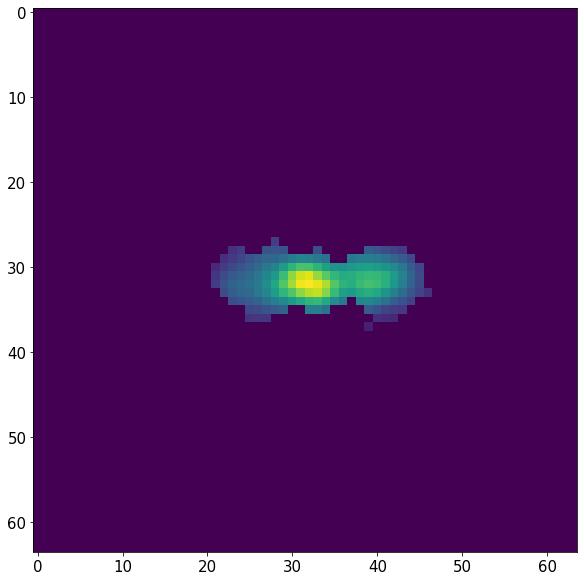

In [ ]:
plt.imshow(data_4)

Open 'puzzle_IV_8551-9102.fits' and retrieve the data

In [ ]:
f = fits.open('puzzle_IV_8551-9102.fits')
d4_p = f[0].data

[WARNING]: unclosed file <_io.FileIO name='puzzle_IV_8086-9101.fits' mode='rb' closefd=True> (ResourceWarning)


Subtract map data from puzzle data and plot the difference

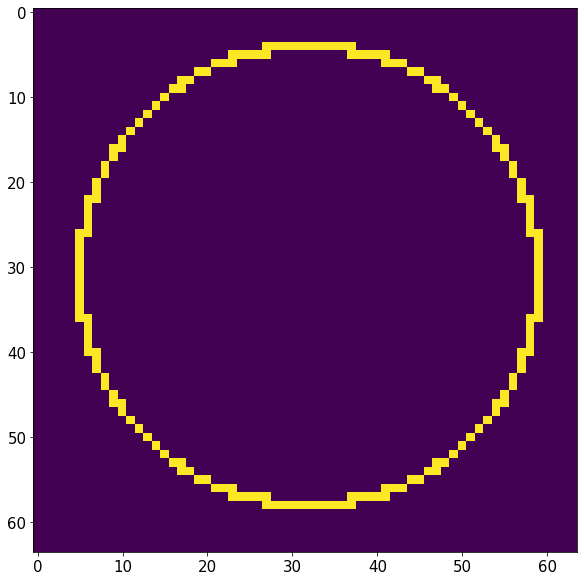

In [ ]:
data_4_diff = d4_p - data_4
plt.imshow(data_4_diff)

Write code to add all four arrays ( data_1_diff, data_2_diff, data_3_diff, data_4_diff) and plot the resultant array

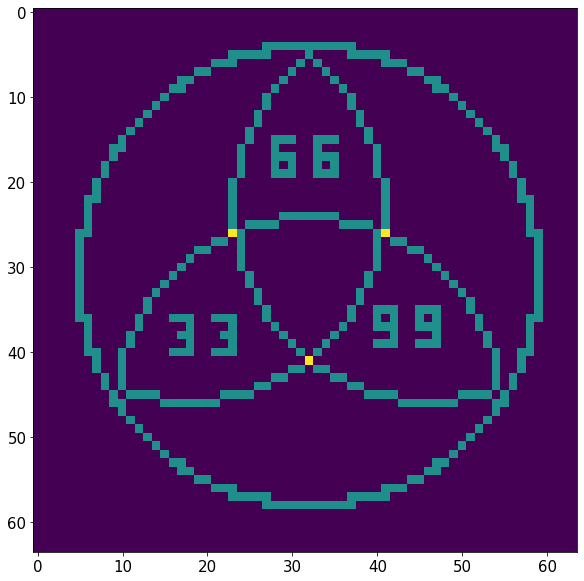

In [ ]:
data_sum = data_1_diff + data_2_diff + data_3_diff + data_4_diff
plt.imshow(data_sum)

Save data in data_sum as fits image with name 'puzzle_4_solution.fits' for submission and future reference

In [ ]:
hdu = fits.PrimaryHDU(data_sum)
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_4_solution.fits', overwrite = True)